In [ ]:
%matplotlib inline

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

## データ概要
- eight school
- 米国のSAT (大学進学適性試験)スコアのコーチング効果の分析データ

## 目的

$p(\theta_{n}) = N(\theta_{n}|\mu + \tau \eta_{n},\sigma)$

$\theta_{n}$と$\sigma$ が得られた条件下で$\mu$,$\tau$,$\eta_{n}$を推定する


## data
データを宣言しておくブロック
- J : スクール番号
- y : コーチング効果
- sigma : 標準偏差

## parameters
モデルのパラメータを宣言するブロック
- mu : 平均値
- tau : 効果
- eta : 操作前の値?

## transformed parameters
parameters ブロックで宣言したパラメータを用いて新しいパラメータを定義するブロック


Inference for Stan model: anon_model_8b63acf8c74fbda3082495b8726b294f.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.43    0.35    5.5  -4.78    4.2   7.56  10.83  18.54    241   1.01
tau         7.2    0.54   6.36   0.27   2.59   5.68    9.9  23.79    139   1.03
eta[0]     0.42    0.03   0.87  -1.32  -0.14   0.43   1.02   2.15   1007    1.0
eta[1]   8.7e-3    0.03   0.87  -1.77  -0.53-7.2e-3   0.57   1.78    735   1.01
eta[2]    -0.15    0.02   0.87  -1.77  -0.69  -0.16   0.38   1.63   1268    1.0
eta[3]    -0.02    0.02   0.84  -1.77  -0.56  -0.04   0.52    1.7   1351   1.01
eta[4]    -0.35    0.03   0.87  -2.03  -0.91  -0.38    0.2   1.41   1121    1.0
eta[5]    -0.17    0.03   0.87  -1.79  -0.76   -0.2   0.43   1.52   1077    1.0
eta[6]     0.37    0.02   0.86  -1.47  -0.18   0.38   0.94   2.03   1267    1.0
eta[7]     0.

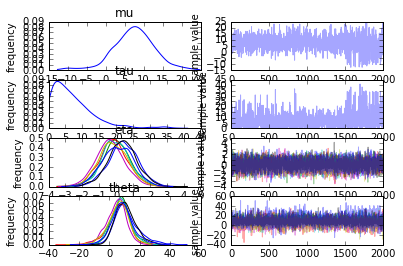

In [10]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}

transformed parameters {
    real theta[J];
    for (j in 1:J)
        theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,iter=1000, chains=4)

print(fit)

eta = fit.extract(permuted=True)['eta']
np.mean(eta, axis=0)

# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()
plt.show()
